# Exercise 1

We first try to draw and define the graph.

For this purpose, we use the networkx and matplotlib library.

In [4]:
import networkx as nx
import matplotlib.pyplot as plt

Now it's time to draw the graph by defining capacities alongside the graph itself.

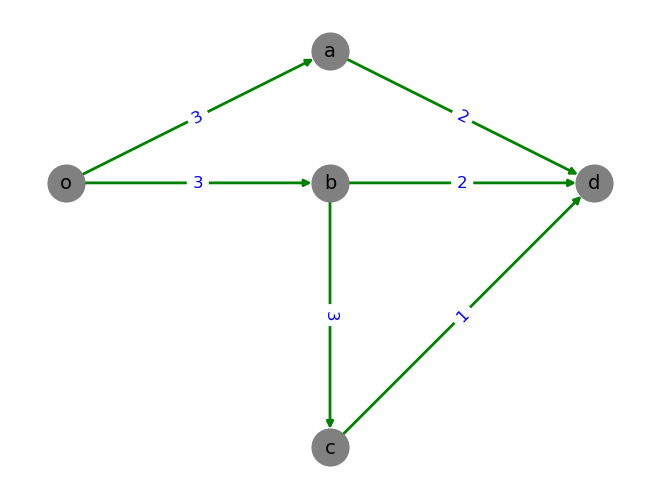

In [53]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.DiGraph()

# Add edges and capacities
edges = [("o", "a", {"capacity": 3}), ("o", "b", {"capacity": 3}),
         ("a", "d", {"capacity": 2}), ("b", "d", {"capacity": 2}),
         ("b", "c", {"capacity": 3}), ("c", "d", {"capacity": 1})]
G.add_edges_from(edges)

# Specify the position for vertices
pos = {"o": [0, 2], "a": [1, 3], "b": [1, 2], "c": [1, 0], "d": [2, 2]}

# Draw the graph
nx.draw(G, pos, with_labels=True, node_size=700, font_size=14, node_color='gray',
        width=2, edge_color='green')

# Add edge labels
labels = nx.get_edge_attributes(G, 'capacity')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size=12, font_color='blue')

plt.show()


## a

We use the minimum cut function in the networkx library in order to find out the requested value.

In [27]:
# Find the minimum cut
cut_value, partition = nx.minimum_cut(G, "o", "d")

# Extract the nodes in the two partitions
source_partition = partition[0]
target_partition = partition[1]

# Calculate the minimum aggregate capacity to remove
min_capacity_to_remove = sum(G[u][v]['capacity'] for u, v in G.edges if u in source_partition and v in target_partition)
print("Minimum aggregate capacity to remove:", min_capacity_to_remove)

# Display the two sets of nodes that define the minimum cut
print("Minimum cut partition:", partition)

Minimum aggregate capacity to remove: 5
Minimum cut partition: ({'b', 'a', 'o', 'c'}, {'d'})


Now we hilight the edges that were judged to be minimum cut

C:\Users\samae\AppData\Local\Temp\ipykernel_13308\142016024.py:21: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  nx.draw_networkx_edges(G, pos, edgelist=cut_edges, width=2, edge_color='red')


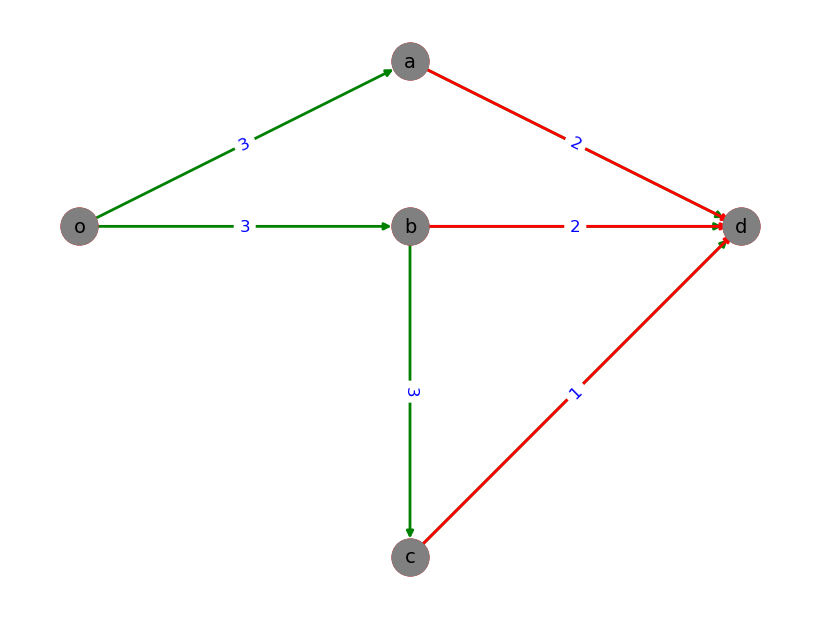

Minimum aggregate capacity to remove: 5
Minimum cut partition: ({'b', 'a', 'o', 'c'}, {'d'})


In [61]:
# Your code to find the minimum cut
cut_value, partition = nx.minimum_cut(G, "o", "d")
source_partition = partition[0]
target_partition = partition[1]
min_capacity_to_remove = sum(G[u][v]['capacity'] for u, v in G.edges if u in source_partition and v in target_partition)

# Specify the position for vertices
pos = {"o": [0, 2], "a": [1, 3], "b": [1, 2], "c": [1, 0], "d": [2, 2]}

# Visualization
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
nx.draw(G, pos, with_labels=True, node_size=700, font_size=14, node_color='gray',
        width=2, edge_color='green', edgecolors='red')

# Highlight the nodes in the two partitions
nx.draw_networkx_nodes(G, pos, nodelist=source_partition, node_color='gray', node_size=700)
nx.draw_networkx_nodes(G, pos, nodelist=target_partition, node_color='gray', node_size=700)

# Highlight the edges in the minimum cut
cut_edges = [(u, v) for u in source_partition for v in target_partition if G.has_edge(u, v)]
nx.draw_networkx_edges(G, pos, edgelist=cut_edges, width=2, edge_color='red')

# Add edge labels
labels = nx.get_edge_attributes(G, 'capacity')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size=12, font_color='blue')

plt.show()

print("Minimum aggregate capacity to remove:", min_capacity_to_remove)
print("Minimum cut partition:", partition)


## b

This section is different from the previous part in the sense that we now want to remove as much capacity as poosible. But this should not be affecting 
the flow from the source to sink. 
For this purpose we use the function maximum_flow in the networkx library.

In [73]:
import networkx as nx

# Assuming G is already defined
source = "o"
sink = "d"

max_flow_value, max_flow_dict = nx.algorithms.flow.maximum_flow(G, source, sink)

print ("Maximum flow that could be removed without harming the overal flow is" ,max_flow_value)
print ("This shows the list of flows from the sink to the source among which we choose the maximum one", max_flow_dict)

Maximum flow that could be removed without harming the overal flow is 5
This shows the list of flows from the sink to the source among which we choose the maximum one {'o': {'a': 2, 'b': 3}, 'a': {'d': 2}, 'b': {'d': 2, 'c': 1}, 'd': {}, 'c': {'d': 1}}


## c

In order to handle the extra capacity, the extra capacity is added to each edge in the graph.
For this purpose we introdice the following constraints:
1. Constraint on Edge capacity: To ensure that after addition of extra capacity, the maximum capacity of each edge is not surpassed.
2. Constraint on total extra capacity: This is to keep the track of the pre-defined extra capacity.

In [75]:
!pip install picos

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/510.7 kB ? eta -:--:--
      --------------------------------------- 10.2/510.7 kB ? eta -:--:--
     -- ---------------------------------- 30.7/510.7 kB 330.3 kB/s eta 0:00:02
     --- --------------------------------- 51.2/510.7 kB 440.4 kB/s eta 0:00:02
     ----- ------------------------------- 71.7/510.7 kB 438.9 kB/s eta 0:00:02
     ----- ------------------------------- 71.7/510.7 kB 438.9 kB/s eta 0:00:02
     ----- ------------------------------- 81.9/510.7 kB 353.1 kB/s eta 0:00:02
     -------- --------------------------- 122.9/510.7 kB 425.1 kB/s eta 0:00:01
     ---------- ------------------------- 153.6/510.7 kB 418.0 kB/s eta 0:00:01
     ---------------- ------------------- 235.5/510.7 kB 600.7 kB/s eta 0:00:01
     ---------------------------- ------- 399.4/510.7 kB 924.3 kB/s eta 0:00:01
     -------------------------------------- 510.7/510.7

In [84]:
import picos as pc

for x in range(0, 10):
  # Extra capacity available
  gamma = x

  # Extracting capacities as dictionary
  c = {}
  for e in sorted(G.edges(data=True)):
    capacity = e[2]['capacity']
    c[(e[0], e[1])]  = capacity

  # Convert the capacities to a PICOS expression.
  cc = pc.new_param('c',c)
  source = "o"
  s, t = "o", 'd'

  maxflow=pc.Problem()

  # Add the flow variables.
  f={}
  for e in G.edges():
    f[e]=maxflow.add_variable('f[{0}]'.format(e))

  # Add the extra capacity variable
  ex={}
  for e in G.edges():
    ex[e]=maxflow.add_variable('ex[{0}]'.format(e))

  # Add the objective variable for the total flow.
  F=maxflow.add_variable('F')

  # CONSTRAINTS
  # Enforce flow conservation.
  maxflow.add_list_of_constraints([
      pc.sum([f[p,i] for p in G.predecessors(i)])
      == pc.sum([f[i,j] for j in G.successors(i)])
      for i in G.nodes() if i not in (s,t)])

  # Set source flow at s.
  maxflow.add_constraint(
    pc.sum([f[p,s] for p in G.predecessors(s)]) + F
    == pc.sum([f[s,j] for j in G.successors(s)]))

  # Set sink flow at t.
  maxflow.add_constraint(
    pc.sum([f[p,t] for p in G.predecessors(t)])
    == pc.sum([f[t,j] for j in G.successors(t)]) + F)

  # Enforce flow nonnegativity.
  maxflow.add_list_of_constraints([f[e] >= 0 for e in G.edges()])

  # Enforce edge capacities.
  maxflow.add_list_of_constraints([f[e] <= cc[e] + ex[e] for e in G.edges()])

  # Enforce extra capacity nonnegativity.
  maxflow.add_list_of_constraints([ex[e] >= 0 for e in G.edges()])

  # Set extra capacity value constraint.
  maxflow.add_constraint(pc.sum([ex[e] for e in G.edges()]) <= gamma)

  # Set the objective.
  maxflow.set_objective('max', F)

  # Solve the problem.
  maxflow.solve(solver='glpk')

import math
import random

print(math.floor(F))

for val in ex.items():
  print(val[0], round(val[1]))

C:\Users\samae\AppData\Local\Temp\ipykernel_13308\67918887.py:14: DeprecationWarning: new_param is deprecated: Use picos.Constant instead.
  cc = pc.new_param('c',c)
C:\Users\samae\AppData\Local\Temp\ipykernel_13308\67918887.py:31: DeprecationWarning: Problem.add_variable is deprecated: Variables can now be created independent of problems, and do not need to be added to any problem explicitly.
  F=maxflow.add_variable('F')


NetworkXError: The node o is not in the digraph.

# Exercise 2

First of all, based on the way books are assigned to people, we generated the related bipartite graph.

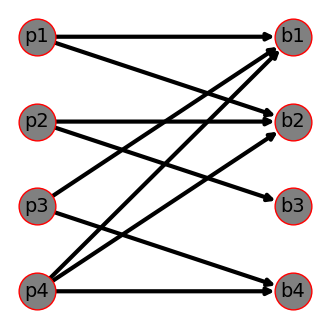

In [93]:
import networkx as nx
import matplotlib.pyplot as plt

class BipartiteGraphVisualizer:
    def __init__(self):
        self.G = nx.DiGraph()
        self.edges = [("p1", "b1"), ("p1", "b2"), ("p2", "b2"), ("p2", "b3"),
                      ("p3", "b1"), ("p3", "b4"), ("p4", "b1"), ("p4", "b2"), ("p4", "b4")]
        self.G.add_edges_from(self.edges)
        self.pos = {"p1": [0, 2], "p2": [0, 1], "p3": [0, 0], "p4": [0, -1],
                    "b1": [1, 2], "b2": [1, 1], "b3": [1, 0], "b4": [1, -1]}

    def visualize(self):
        fig, ax = plt.subplots(figsize=(4, 4))
        nx.draw(self.G, self.pos, node_size=700, font_size=14, node_color='gray', with_labels=True, width=3,
                edge_color='black', edgecolors='red', ax=ax)
        plt.savefig("plot2.1.svg", format="svg")
        plt.show()

# Create and visualize the bipartite graph
visualizer = BipartiteGraphVisualizer()
visualizer.visualize()


## a

 We create a graph to represent the relationships between people and books based on their interests, then we use the networkx package to find a
perfect matching between people and books, and finally we visualize the graph. In the graph, matching pairs are highlighted.


Perfect matching exists: True
Matching pairs:
p1 -> b2
p2 -> b3
p3 -> b1
p4 -> b4


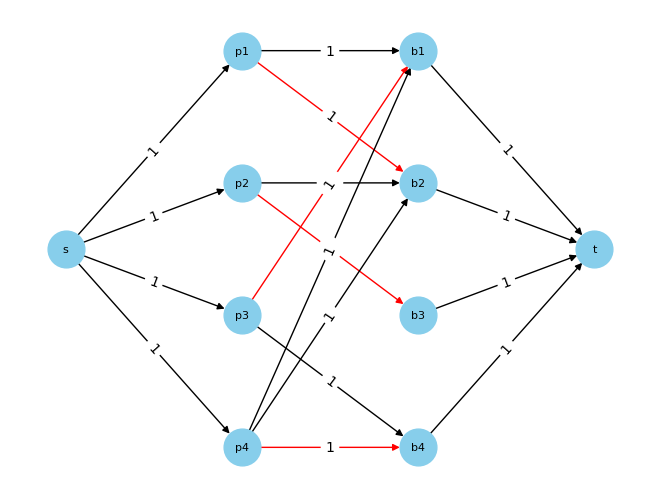

In [147]:
import networkx as nx
import matplotlib.pyplot as plt

class BookMatching:
    def __init__(self):
        self.G = nx.DiGraph()
        self.G.add_node('s')  # Source node
        self.G.add_node('t')  # Sink node
        self.people = ['p1', 'p2', 'p3', 'p4']
        self.books = ['b1', 'b2', 'b3', 'b4']
        self.interests = {
            'p1': ['b1', 'b2'],
            'p2': ['b2', 'b3'],
            'p3': ['b1', 'b4'],
            'p4': ['b1', 'b2', 'b4']
        }
        self.edge_colors = []

    def create_graph(self):
        for person in self.people:
            self.G.add_edge('s', person, capacity=1)  # Edge from source to person
            for book in self.interests[person]:
                self.G.add_edge(person, book, capacity=1)  # Edge from person to interested books
        for book in self.books:
            self.G.add_edge(book, 't', capacity=1)  # Edge from books to sink

    def calculate_matching(self):
        flow_value, flow_dict = nx.maximum_flow(self.G, 's', 't')
        perfect_matching_exists = flow_value == len(self.people)
        matching = {}
        if perfect_matching_exists:
            for person in self.people:
                for book, flow in flow_dict[person].items():
                    if flow > 0:  # If the flow is greater than 0, then the book is matched to the person
                        matching[person] = book
        return perfect_matching_exists, matching

    def visualize_graph(self):
        position = {"p1": [0, 2], "p2": [0, 1], "p3": [0, 0], "p4": [0, -1], 
                    "b1": [1, 2], "b2": [1, 1], "b3": [1, 0], "b4": [1, -1], 
                    "s": [-1, 0.5], "t": [2, 0.5]}

        edge_colors = ["black", "black", "black", "black", "black", "red", "black", "black", "black", "red", "black", "red", "black", "black", "black", "black", "red"]
        
        labels = nx.get_edge_attributes(self.G, 'capacity')
        nx.draw(self.G, pos=position, with_labels=True, node_size=700, node_color='skyblue', font_size=8, edge_color = edge_colors)
        nx.draw_networkx_edge_labels(self.G, position, edge_labels=labels)
        plt.show()

# Main code execution
book_matching = BookMatching()
book_matching.create_graph()
perfect_matching_exists, matching = book_matching.calculate_matching()

print("Perfect matching exists:", perfect_matching_exists)
print("Matching pairs:")
for person, book in matching.items():
    print(f"{person} -> {book}")

book_matching.visualize_graph()


## b

In this subsection is that now we know how many copies are available for each book. Accordingly, there are two
copies of the first, three of the second, two of the second and two copies available from the last book. 
What is difference from the previous section is that we no longer care what book each person is interested in; all we care is that out of the nine copies available, we want to assign as many books as poosible, hence the max-flow problem.

Total number of books that can be assigned: 8


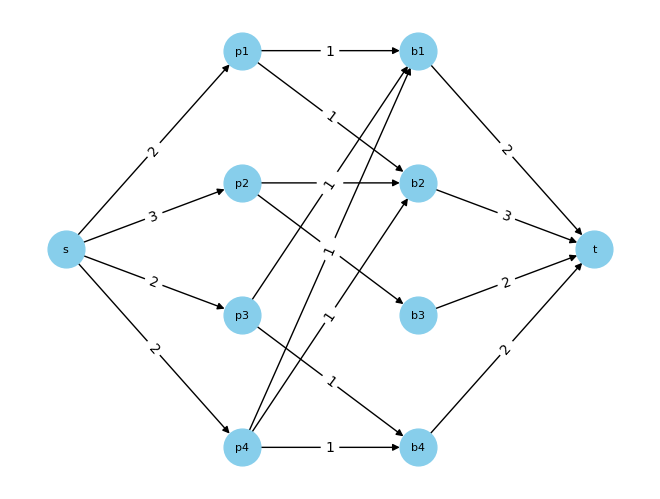

In [150]:
import networkx as nx
import matplotlib.pyplot as plt

def create_graph():
    # Define the capacities for the edges from books to sink (number of copies for each book)
    book_copies = {'b1': 2, 'b2': 3, 'b3': 2, 'b4': 2}

    # Create a new directed graph
    G = nx.DiGraph()

    # Add nodes for the source and sink
    G.add_node('s')
    G.add_node('t')

    # Add edges from source to people with specified capacities
    people_capacities = {'p1': 2, 'p2': 3, 'p3': 2, 'p4': 2}
    for person, capacity in people_capacities.items():
        G.add_edge('s', person, capacity=capacity)

    # Define the interests of each person
    interests = {
        'p1': ['b1', 'b2'],
        'p2': ['b2', 'b3'],
        'p3': ['b1', 'b4'],
        'p4': ['b1', 'b2', 'b4']
    }

    # Add edges from people to books they are interested in with capacity of 1
    for person, books in interests.items():
        for book in books:
            G.add_edge(person, book, capacity=1)

    # Add edges from books to sink with the updated capacities
    for book, copies in book_copies.items():
        G.add_edge(book, 't', capacity=copies)

    return G

def main():
    # Create the graph
    G = create_graph()

    # Output the total number of books assigned
    flow_value, _ = nx.maximum_flow(G, 's', 't')
    print("Total number of books that can be assigned:", flow_value)

    # Define node positions for better visualization
    position = {'s': (-1, 0.5), 't': (2, 0.5), 'p1': (0, 2), 'p2': (0, 1), 'p3': (0, 0), 'p4': (0, -1),
                'b1': (1, 2), 'b2': (1, 1), 'b3': (1, 0), 'b4': (1, -1)}

    # Visualize the graph
    labels = nx.get_edge_attributes(G, 'capacity')
    nx.draw(G, pos=position, with_labels=True, node_size=700, node_color='skyblue', font_size=8, edge_color='black')
    nx.draw_networkx_edge_labels(G, position, edge_labels=labels)

    plt.show()

if __name__ == "__main__":
    main()


## c

According to the max-flow solution, some books inevitably remain unassigned and some are fully assigned. Therefore, the idea here is to sell the unsed and buy those that are completely used. Hence, for every book we calculate the amount available (inflow) and the amount assigned (outflow). If these two are equal, then there no need to buy or sell books. If they are unequal, we either sell or buy copies of that book.

In [158]:
# Store nodes and edges
nodes = G.nodes
edges = G.edges

# Function to calculate inflow and outflow for a given node
def calculate_flow(node, direction):
    if direction == 'in':
        return sum(data['capacity'] for u, v, data in G.in_edges(node, data=True))
    elif direction == 'out':
        return sum(data['capacity'] for u, v, data in G.out_edges(node, data=True))

# Iterate through each node
for node in nodes:
    # Skip source and person nodes
    if node == "s" or node in ["p1", "p2", "p3", "p4"]:
        continue
    
    inflow = calculate_flow(node, 'in')
    outflow = calculate_flow(node, 'out')
    
    # Print inflow and outflow
    print(f"{node} inflow: {inflow}")
    print(f"{node} outflow: {outflow}")

    # Calculate netflow
    netflow = inflow - outflow

    # Print actions based on netflow
    if (netflow > 0 and node_i != "s" and node_i != "t"):
        print(f"1 copy of the book {node} can be sold ")
    elif (netflow < 0 and node_i != "s" and node_i != "t"):
        print(f"{-netflow} copy of the book {node} can be bought ")

# Calculate inflow and outflow for the destination node 't'
inflow_t = calculate_flow('t', 'in')
outflow_t = calculate_flow('t', 'out')
print("t inflow:", inflow_t)
print("t outflow:", outflow_t)

# Calculate the maximum possible outflow
max_possible_outflow = max(inflow_t, 0)
print("Max possible outflow:", max_possible_outflow)


t inflow: 9
t outflow: 0
1 copy of the book t can be sold 
b1 inflow: 3
b1 outflow: 2
1 copy of the book b1 can be sold 
b2 inflow: 3
b2 outflow: 3
b3 inflow: 1
b3 outflow: 2
1 copy of the book b3 can be bought 
b4 inflow: 2
b4 outflow: 2
t inflow: 9
t outflow: 0
Max possible outflow: 9


# Exercise 3

## c

In [47]:
!pip install cvxpy

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/1.0 MB ? eta -:--:--
   --------- ------------------------------ 0.2/1.0 MB 5.0 MB/s eta 0:00:01
   ------------------------- -------------- 0.7/1.0 MB 6.9 MB/s eta 0:00:01
   -------------------------------------- - 1.0/1.0 MB 7.1 MB/s eta 0:00:01
   ---------------------------------------- 1.0/1.0 MB 6.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/321.5 kB ? eta -:--:--
   ---------------------------------------- 321.5/321.5 kB 6.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/72.0 kB ? eta -:--:--
   ---------------------------------------- 72.0/72.0 kB ? eta 0:00:00
   ---------------------------------------- 0.0/293.1 kB ? eta -:--:--
   ---------------------------------------- 293.1/293.1 kB 8.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/8.4 MB ? eta -:--:--
   - --------------------------------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [50]:
import scipy.io
import numpy as np
import cvxpy as cp
import networkx as nx

In [39]:
traffic = scipy.io.loadmat('traffic.mat').get('traffic.mat')

[(1, 2), (1, 6), (2, 3), (2, 7), (3, 4), (3, 8), (3, 9), (4, 5), (4, 9), (5, 14), (6, 7), (6, 10), (7, 8), (7, 10), (8, 9), (8, 11), (9, 13), (9, 12), (13, 14), (13, 17), (14, 17), (10, 11), (10, 15), (11, 12), (11, 15), (15, 16), (12, 13), (16, 17)]


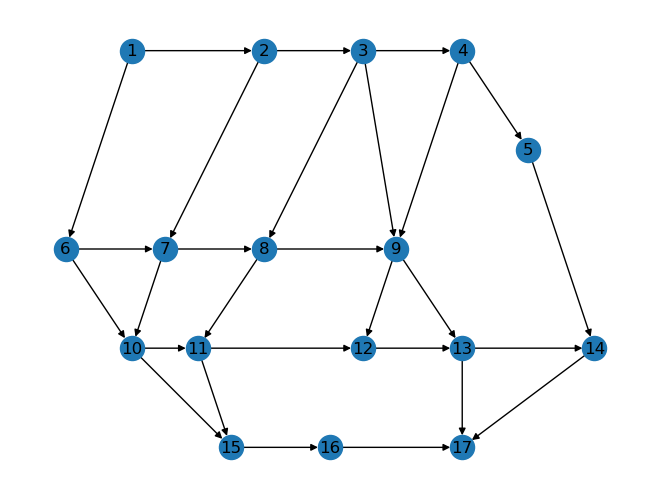

In [51]:
capacities = scipy.io.loadmat('capacities.mat').get('capacities').reshape(28, )
traveltime = scipy.io.loadmat('traveltime.mat').get('traveltime').reshape(28, )
flow = scipy.io.loadmat('flow.mat').get('flow').reshape(28, )
traffic = scipy.io.loadmat('traffic.mat').get('traffic')

# creating Graph
G = nx.DiGraph()

#creating node-edge incidence matrix
for edge in range(28):            #searching in edges
    capacity = capacities[edge]
    travtime = traveltime[edge]
    for r in range(17):        # check nodes the output edge of node i is the input node of j
        if traffic[r][edge] == 1:
            i = r              #second node
        if traffic[r][edge] == -1:
            j = r              # first node
    G.add_edges_from([(i + 1, j + 1)], capacity=capacity, traveltime=travtime)

print(G.edges())

# Draw Graph
positions = {1: [0, 1], 2: [2, 1], 3: [3.5, 1], 4: [5, 1], 5: [6, 0],
             6: [-1, -1], 7: [0.5, -1], 8: [2, -1], 9: [4, -1],10: [0, -2],
             11: [1, -2], 12: [3.5, -2], 13: [5, -2], 14: [7, -2], 15: [1.5, -3],
             16: [3, -3], 17: [5, -3]}

nx.draw(G, positions, with_labels=True)

In [ ]:
# Hesam's way

In [56]:
# Define the basic variables and matrices for the optimization problem
B = traffic  # B matrix representing the network structure
f = cp.Variable(B.shape[1])  # Variable representing the flow on each edge

# Define exogenous flow vector - unitary inflow from node 1 to node 17
exogenousFlow = np.array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1])

# Define the travel time vector
traveltime = np.array(traveltime)

# Define the optimization objective - minimize the total travel time
objective = cp.Minimize(traveltime.T @ f)  # Linear combination of the flow values

# Define the constraints for the optimization problem
constraints = [f >= 0, B @ f == exogenousFlow]  # Non-negativity constraint and flow balance constraint

# Solve the optimization problem
cp.Problem(objective, constraints).solve()

# Print the results
print("Optimal value of f:", f.value)  # Optimal flow values
print("External inflow:", B @ flow)  # Total flow on each edge (external inflow)

Optimal value of f: [1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0.]
External inflow: [ 16282   9094  19448   4957   -746   4768    413     -2  -5671   1169
     -5  -7131   -380  -7412  -7810  -3430 -23544]


In [61]:
flow = scipy.io.loadmat('flow.mat').get('flow').reshape(28, )

In [ ]:
# My way

In [71]:
import numpy as np
import cvxpy as cp

# Define the network structure matrix and the flow variables
network_structure = traffic  # Assume 'traffic' matrix is defined elsewhere
floww = cp.Variable(network_structure.shape[1], nonneg=True)  # Flow variables, constrained to be non-negative
flow = scipy.io.loadmat('flow.mat').get('flow').reshape(28, )

# Define the exogenous flow vector: unitary inflow from node 1 to node 17
exogenous_flow = np.array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1])

# Define the travel time vector
travel_time = np.array(traveltime)  # Assuming 'travel_time' vector is defined elsewhere

# Define the optimization objective: minimize the total travel time
objective = cp.Minimize(traveltime @ floww)  # Linear combination of flow values and travel times

# Define the constraints for the optimization problem
flow_constraints = [network_structure @ floww == exogenous_flow]  # Flow balance constraint

# Solve the optimization problem
problem = cp.Problem(objective, flow_constraints)
optimal_value = problem.solve()

# Print the results
if problem.status == 'optimal':
    print("Optimal value of flow:", floww.value)  # Optimal flow values
    print("Total flow on each edge (external inflow):", traffic @ flow)
else:
    print("Optimization problem not solved successfully.")


Optimal value of flow: [1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0.]
Total flow on each edge (external inflow): [ 16282   9094  19448   4957   -746   4768    413     -2  -5671   1169
     -5  -7131   -380  -7412  -7810  -3430 -23544]


## d

In [73]:
# Hesam's way

In [72]:
# Define the exogenous inflow vector
exogenousInflow = np.array([16282, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -16282])

# Define the flow variable representing the flow on each edge in the network
f = cp.Variable(B.shape[1])

# Define the cost function to be minimized
costFunction = cp.sum(
    cp.multiply(traveltime * capacities, cp.inv_pos(1 - cp.multiply(f, 1 / capacities))) - traveltime * capacities
)
# The cost function is a combination of travel time, capacities, and flow on each edge

# Define constraints for the optimization problem
# B @ f == exogenousInflow ensures that the flow on each edge, when multiplied by matrix B, equals the specified external inflow vector.
# f <= capacities restricts the flow on each edge to be less than or equal to its capacity.
# f >= 0 enforces that the flow on each edge is non-negative.
constraints = [f >= 0, B @ f == exogenousInflow, f <= capacities]

# Solve the optimization problem to find the optimal flow and cost
cost_optimal = cp.Problem(cp.Minimize(costFunction), constraints).solve()

# Print the results
print("Optimal flow:", f.value)
print("Optimal cost:", cost_optimal)

Optimal flow: [6454.1  5919.4  2995.3  2995.3  9827.9  4497.08 2897.43 2435.99 3047.33
  534.7     0.   2924.1     0.   2995.3  5330.82 2730.87 4734.3  2134.35
  461.44 2312.76 3192.31 5505.07 2310.52    0.   6241.88 5305.82 4734.3
 4734.3 ]
Optimal cost: 23835.484474547633


In [74]:
# my way

In [76]:
import numpy as np
import cvxpy as cp

# Exogenous inflow vector
exogenous_inflow = np.array([16282, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -16282])

# Define the flow variable for each edge
flow_variable = cp.Variable(B.shape[1])

# Define the cost function to minimize
cost_function = cp.sum(cp.multiply(traveltime * capacities, cp.inv_pos(1 - flow_variable / capacities)) - traveltime * capacities)

# Constraints for the optimization problem
constraints = [flow_variable >= 0, B @ flow_variable == exogenous_inflow, flow_variable <= capacities]

# Solve the optimization problem to find the optimal flow and cost
problem = cp.Problem(cp.Minimize(cost_function), constraints)
optimal_cost = problem.solve()

# Print the results
print("Optimal flow:", flow_variable.value)
print("Optimal cost:", optimal_cost)


Optimal flow: [6454.1  5919.4  2995.3  2995.3  9827.9  4497.08 2897.43 2435.99 3047.33
  534.7     0.   2924.1     0.   2995.3  5330.82 2730.87 4734.3  2134.35
  461.44 2312.76 3192.31 5505.07 2310.52    0.   6241.88 5305.82 4734.3
 4734.3 ]
Optimal cost: 23835.48447454763


## e 

In [77]:
##Hesam's way

In [78]:
# Define the cost function for Wardrop equilibrium
costFunction2 = cp.sum(-cp.multiply(traveltime * capacities, cp.log(1 - (cp.multiply(f, 1 / capacities)))))
# The cost function represents a form of Wardrop equilibrium in transportation networks

# Define constraints for the optimization problem
# Similar to the previous code, ensuring non-negativity, external inflow, and capacity constraints
constraints2 = [f >= 0, B @ f == exogenousInflow, f <= capacities]

# Solve the optimization problem to find the optimal flow and cost for Wardrop equilibrium
cost_optimal2 = cp.Problem(cp.Minimize(costFunction2), constraints2).solve()

# Print the result
print("Wardrop equilibrium flow:", f.value)

Wardrop equilibrium flow: [6532.48 6532.48 2206.79 2206.79 9749.52 4493.37 2714.27 2203.86 3342.79
    0.    188.86 4136.84    0.   2206.79 5256.15 2247.38 4787.87 1779.1
  699.27 2997.91 2946.65 5944.56 2507.94    0.   6779.41 4714.73 4787.87
 4787.87]


In [79]:
## my way

In [94]:

# Define the cost function for Wardrop equilibrium
costFunction2 = cp.sum(-cp.multiply(traveltime * capacities, cp.log(1 - (cp.multiply(f, 1 / capacities)))))
# The cost function represents a form of Wardrop equilibrium in transportation networks

# Define constraints for the optimization problem
# Similar to the previous code, ensuring non-negativity, external inflow, and capacity constraints
constraints2 = [f >= 0, B @ f == exogenousInflow, f <= capacities]
objective = cp.Minimize (costFunction2)

# Solve the optimization problem to find the optimal flow and cost for Wardrop equilibrium
cost_optimal2 = cp.Problem(objective, constraints2)

# Print the result
print("Wardrop equilibrium flow:", f.value)

Wardrop equilibrium flow: [6532.48 6532.48 2206.79 2206.79 9749.52 4493.37 2714.27 2203.86 3342.79
    0.    188.86 4136.84    0.   2206.79 5256.15 2247.38 4787.87 1779.1
  699.27 2997.91 2946.65 5944.56 2507.94    0.   6779.41 4714.73 4787.87
 4787.87]


In [95]:
## g